In [1]:
import numpy
import pandas as pd
import numpy as np
from numpy import nan
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\smriti\Downloads\gapminder.csv')
print(df)
print(len(df))
print(len(df.columns))
print(len(df.index))
print(df.head(20))

                country incomeperperson alcconsumption armedforcesrate  \
0           Afghanistan                           0.03       0.5696534   
1               Albania     1914.996551           7.29       1.0247361   
2               Algeria     2231.993335           0.69        2.306817   
3               Andorra      21943.3399          10.17                   
4                Angola     1381.004268           5.57       1.4613288   
..                  ...             ...            ...             ...   
208             Vietnam     722.8075588           3.91       1.0853671   
209  West Bank and Gaza                                      5.9360854   
210         Yemen, Rep.     610.3573673            0.2       2.3162346   
211              Zambia      432.226337           3.56       0.3413352   
212            Zimbabwe     320.7718899           4.96       1.0327854   

    breastcancerper100th co2emissions femaleemployrate hivrate  \
0                   26.8     75944000      25

In [3]:
print(df['employrate'].head(20))
df['employrate']=df['employrate'].head(20).replace(' ',numpy.nan)

a1=df['employrate'].value_counts(sort=False,dropna=False)
print(a1)

0     55.70000076
1     51.40000153
2            50.5
3                
4     75.69999695
5                
6     58.40000153
7     40.09999847
8                
9            61.5
10    57.09999847
11    60.90000153
12    66.59999847
13    60.40000153
14    68.09999847
15    66.90000153
16    53.40000153
17    48.59999847
18    56.79999924
19    71.59999847
Name: employrate, dtype: object
NaN            196
60.40000153      1
61.5             1
55.70000076      1
57.09999847      1
51.40000153      1
56.79999924      1
53.40000153      1
58.40000153      1
71.59999847      1
50.5             1
40.09999847      1
60.90000153      1
48.59999847      1
75.69999695      1
66.59999847      1
66.90000153      1
68.09999847      1
Name: employrate, dtype: int64


In [4]:
print(df['femaleemployrate'].head(20))
df['femaleemployrate']=df['femaleemployrate'].head(20).replace(' ',numpy.nan)

a2=df['femaleemployrate'].value_counts(sort=False,dropna=False)
print(a2)

0     25.60000038
1     42.09999847
2     31.70000076
3                
4     69.40000153
5                
6     45.90000153
7     34.20000076
8                
9     54.59999847
10    49.70000076
11    56.20000076
12    60.70000076
13    30.20000076
14    53.59999847
15    60.29999924
16    48.59999847
17    41.70000076
18    38.79999924
19    58.20000076
Name: femaleemployrate, dtype: object
NaN            196
38.79999924      1
25.60000038      1
53.59999847      1
45.90000153      1
41.70000076      1
42.09999847      1
60.29999924      1
60.70000076      1
30.20000076      1
69.40000153      1
49.70000076      1
54.59999847      1
58.20000076      1
56.20000076      1
31.70000076      1
48.59999847      1
34.20000076      1
Name: femaleemployrate, dtype: int64


In [5]:
print(df['incomeperperson'].head(20))
df['incomeperperson']=df['incomeperperson'].head(20).replace(' ',numpy.nan)

a3=df['incomeperperson'].value_counts(sort=False,dropna=False)
print(a3)

0                
1     1914.996551
2     2231.993335
3      21943.3399
4     1381.004268
5     11894.46407
6     10749.41924
7     1326.741757
8                
9     25249.98606
10    26692.98411
11    2344.896916
12    19630.54055
13    12505.21254
14    558.0628766
15    9243.587053
16    2737.670379
17    24496.04826
18    3545.652174
19    377.0396995
Name: incomeperperson, dtype: object
NaN            195
10749.41924      1
26692.98411      1
9243.587053      1
3545.652174      1
1326.741757      1
1381.004268      1
21943.3399       1
2737.670379      1
24496.04826      1
558.0628766      1
11894.46407      1
1914.996551      1
12505.21254      1
2231.993335      1
2344.896916      1
25249.98606      1
19630.54055      1
377.0396995      1
Name: incomeperperson, dtype: int64


In [6]:
def check_missing_values(df,cols):
     for col in cols:
         print("Column {} is missing:".format(col))
         print((df[col].values==' ').sum())
         print()

In [7]:
def convert_numeric(df1,cols):
    
    for col in cols:
        df1[col]=pd.to_numeric(df1[col],errors='coerce')

df=pd.read_csv(r'C:\Users\smriti\Downloads\gapminder.csv')  
print("Null values:")
print(df.isnull().values.any())

Null values:
False


In [8]:
cols=['lifeexpectancy','breastcancerper100th','suicideper100th']
norm_cols=['employrate','femaleemployrate','incomeperperson']

df2=df.copy()

check_missing_values(df, cols)
check_missing_values(df, norm_cols)

convert_numeric(df2, cols)
convert_numeric(df2, norm_cols)

Column lifeexpectancy is missing:
22

Column breastcancerper100th is missing:
40

Column suicideper100th is missing:
22

Column employrate is missing:
35

Column femaleemployrate is missing:
35

Column incomeperperson is missing:
23



In [9]:
def bin(df1,cols):
     for col in cols:
         new_col_name="{}_bins".format(col)
         df1[new_col_name]=pd.qcut(df1[col],10,labels=['1=10%',"2-20%","3=30%","4=40%","5=50%","6=60%","7=70%","8=80%","9=90%","10=100%"])
         
df3=df2.copy()

In [10]:
# This creates new columns filled with the binned column data

bin(df3,cols)
bin(df3,norm_cols)

anova_df = df3[['incomeperperson', 'femaleemployrate_bins', 'employrate_bins']].dropna()

relate_df = df3[['incomeperperson', 'femaleemployrate_bins']]

anova = smf.ols(formula='incomeperperson ~ C(femaleemployrate_bins)', data=anova_df).fit()

print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:        incomeperperson   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.737
Date:                Sat, 04 Jul 2020   Prob (F-statistic):            0.00541
Time:                        13:02:18   Log-Likelihood:                -1764.8
No. Observations:                 166   AIC:                             3550.
Df Residuals:                     156   BIC:                             3581.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [11]:
# We may also want to check the mean and standard deviation for the groups

mean = relate_df.groupby("femaleemployrate_bins").mean()
sd = relate_df.groupby("femaleemployrate_bins").std()
print(mean)
print(sd)

                       incomeperperson
femaleemployrate_bins                 
1=10%                      3660.267597
2-20%                      4921.802120
3=30%                      7620.783174
4=40%                      5528.027964
5=50%                     13049.906615
6=60%                      5732.790223
7=70%                     11630.375108
8=80%                     14908.132995
9=90%                      7214.079848
10=100%                    2434.050869
                       incomeperperson
femaleemployrate_bins                 
1=10%                      3399.507431
2-20%                      5749.979711
3=30%                      9107.811927
4=40%                      6351.651046
5=50%                     15375.571447
6=60%                      7348.898137
7=70%                     13557.557168
8=80%                     15483.860973
9=90%                     11415.036386
10=100%                    7882.834624


In [12]:
def half_bin(df1, cols):

    for col in cols:
        new_col_name = "{}_bins_2".format(col)
        df1[new_col_name] = pd.qcut(df1[col], 2, labels=["1=50%", "2=100%"])

half_bin(df3, ['femaleemployrate'])

In [13]:
# Recoding scheme

recode_2 = {"3=30%": "3=30%", "7=70%": "7=70%"}
recode_3 = {"2=20%": "2=20%", "8=80": "8=80"}
recode_4 = {"6=60%": "6=60%", "9=90%": "9=90%"}
recode_5 = {"4=40%": "4=40%", "7=70%": "7=70%"}

In [14]:
# Create the new features
df3['Comp_3v7'] = df3['incomeperperson_bins'].map(recode_2)
df3['Comp_2v8'] = df3['incomeperperson_bins'].map(recode_3)
df3['Comp_6v9'] = df3['incomeperperson_bins'].map(recode_4)
df3['Comp_4v7'] = df3['incomeperperson_bins'].map(recode_5)

In [15]:
count_table = pd.crosstab(df3['femaleemployrate_bins_2'], df3['incomeperperson_bins'])
print(count_table.head(10))

incomeperperson_bins     1=10%  2-20%  3=30%  4=40%  5=50%  6=60%  7=70%  \
femaleemployrate_bins_2                                                    
1=50%                        2      3      9     10     11     12     11   
2=100%                      17     16      8      5      4      7      3   

incomeperperson_bins     8=80%  9=90%  10=100%  
femaleemployrate_bins_2                         
1=50%                       11      8        3  
2=100%                       5      9       12  


In [17]:
print('Assoc. - female employee rate and income per person')
print(pearsonr(df_clean['femaleemployrate'], df_clean['incomeperperson']))

print('Assoc. - between employment rate and income per person')
print(pearsonr(df_clean['employrate'], df_clean['incomeperperson']))

Assoc. - female employee rate and income per person
(0.021121311194267543, 0.7902847605862906)
Assoc. - between employment rate and income per person
(-0.008526427248756399, 0.9145135443378481)


In [18]:
def income_groups(row):
    if row['incomeperperson'] <= 744.23:
        return 1
    elif row['incomeperperson'] <= 942.32:
        return 2
    else:
        return 3

In [21]:
# Create a few subframes to try test for moderation

subframe_1 = df_clean[(df_clean['income_group'] == 1)]
subframe_2 = df_clean[(df_clean['income_group'] == 2)]
subframe_3 = df_clean[(df_clean['income_group'] == 3)]

In [25]:
print('Assoc. -employee rate and female employee rate for low income countries')

print(pearsonr(subframe_1['employrate'], subframe_1['femaleemployrate']))

Assoc. -employee rate and female employee rate for low income countries
(0.9295021527952501, 1.1160563249533423e-20)


In [23]:
print('Assoc. - employee rate and female employee rate for medium income countries')

print(pearsonr(subframe_2['employrate'], subframe_2['femaleemployrate']))

Assoc. - employee rate and female employee rate for medium income countries
(0.7628727173433518, 0.44757656638718524)


In [24]:
print('Assoc. - employee rate and female employee rate for high income countries')

print(pearsonr(subframe_3['employrate'], subframe_3['femaleemployrate']))

Assoc. - employee rate and female employee rate for high income countries
(0.7664357771213115, 7.011767293090408e-23)


In [26]:
df['incomeperperson']=df['incomeperperson'].apply(pd.to_numeric, errors='coerce')
df['employrate']=df['employrate'].apply(pd.to_numeric, errors='coerce') 
df['femaleemployrate']=df['femaleemployrate'].apply(pd.to_numeric, errors='coerce') 

sub1=df[(df['incomeperperson']>0)&(df['employrate']>0)&(df['femaleemployrate']>0)]

sub2=sub1.copy()

In [27]:
p1=sub2['country']
p2=sub2['incomeperperson']
p3=sub2['employrate']
p4=sub2['femaleemployrate']
print(p1,p2,p3,p4)

1          Albania
2          Algeria
4           Angola
6        Argentina
7          Armenia
          ...     
207      Venezuela
208        Vietnam
210    Yemen, Rep.
211         Zambia
212       Zimbabwe
Name: country, Length: 166, dtype: object 1       1914.996551
2       2231.993335
4       1381.004268
6      10749.419240
7       1326.741757
           ...     
207     5528.363114
208      722.807559
210      610.357367
211      432.226337
212      320.771890
Name: incomeperperson, Length: 166, dtype: float64 1      51.400002
2      50.500000
4      75.699997
6      58.400002
7      40.099998
         ...    
207    59.900002
208    71.000000
210    39.000000
211    61.000000
212    66.800003
Name: employrate, Length: 166, dtype: float64 1      42.099998
2      31.700001
4      69.400002
6      45.900002
7      34.200001
         ...    
207    45.799999
208    67.599998
210    20.299999
211    53.500000
212    58.099998
Name: femaleemployrate, Length: 166, dtype: float64


Text(0.5, 1.0, 'Income per person in different countries')

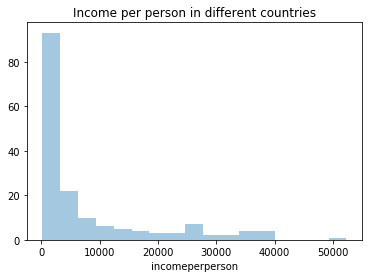

In [28]:
sns.distplot(sub2['incomeperperson'].dropna(),kde=False)
plt.title('Income per person in different countries')

Text(0.5, 1.0, 'Employment rates in different countries')

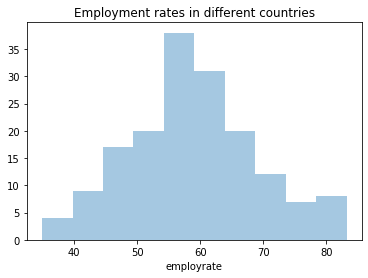

In [29]:
sns.distplot(sub2['employrate'].dropna(),kde=False)
plt.title('Employment rates in different countries')

In [30]:
print('Describe the data for employment rates')
desc1=sub2['employrate'].describe()
print(desc1)

Describe the data for employment rates
count    166.000000
mean      58.987952
std       10.327332
min       34.900002
25%       51.575001
50%       58.850000
75%       64.975000
max       83.199997
Name: employrate, dtype: float64


Text(0.5, 1.0, 'Female Employment rates in different countries')

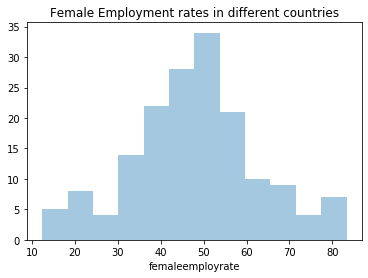

In [31]:
sns.distplot(sub2['femaleemployrate'].dropna(),kde=False)
plt.title('Female Employment rates in different countries')

In [32]:
print('Describe the data for Female employment rates')
desc2=sub2['femaleemployrate'].describe()
print(desc2)

Describe the data for Female employment rates
count    166.000000
mean      47.963855
std       14.618138
min       12.400000
25%       39.250001
50%       48.450001
75%       56.150001
max       83.300003
Name: femaleemployrate, dtype: float64


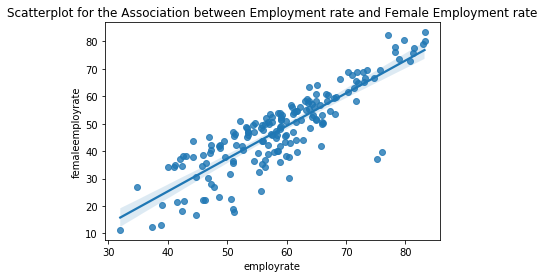

In [33]:
sns.regplot(x='employrate',y='femaleemployrate',fit_reg=True,data=df)
plt.title("Scatterplot for the Association between Employment rate and Female Employment rate")
plt.show()

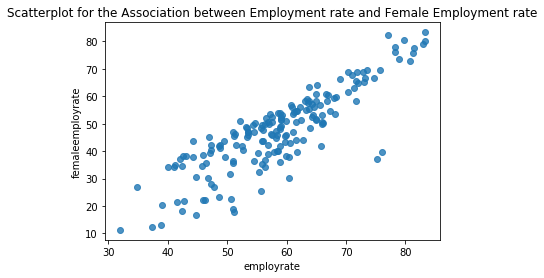

In [34]:
sns.regplot(x='employrate',y='femaleemployrate',fit_reg=False,data=df)
plt.title("Scatterplot for the Association between Employment rate and Female Employment rate")
plt.show()

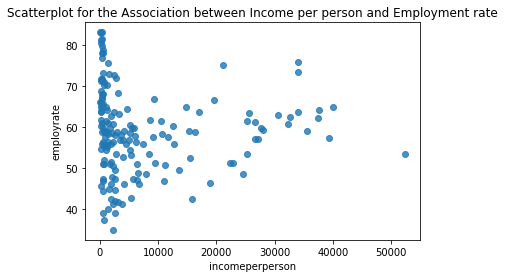

In [39]:
sns1=sns.regplot(x='incomeperperson',y='employrate',fit_reg=False,data=df)
plt.title("Scatterplot for the Association between Income per person and Employment rate")
plt.show()

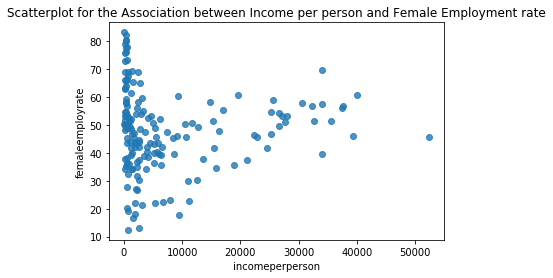

In [40]:
sns2=sns.regplot(x='incomeperperson',y='femaleemployrate',fit_reg=False,data=df)
plt.title("Scatterplot for the Association between Income per person and Female Employment rate")
plt.show()